哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
dfa=pd.read_csv('A_lvr_land_A.csv')
dfb=pd.read_csv('B_lvr_land_A.csv')
dfe=pd.read_csv('E_lvr_land_A.csv')
dff=pd.read_csv('F_lvr_land_A.csv')


In [3]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....

dfa=dfa.drop(0)
dfb=dfb.drop(0)
dfe=dfe.drop(0)
dff=dff.drop(0)

In [4]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
cityn = pd.Series(['Taipei', 'New_Taipe', 'Taichung', 'Kaohsiung'])

dfa['city']=cityn[0]
dff['city']=cityn[1]
dfb['city']=cityn[2]
dfe['city']=cityn[3]
dfe

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,鼓山區,房地(土地+建物)+車位,高雄市鼓山區明倫路121~150號,17.2,商,NaN,NaN,1090221,土地1建物2車位1,一層，二層，騎樓,...,升降機械,0.0,0,NaN,RPTNMLLKNHPFFAE18CA,139.45,4.14,0.00,NaN,Kaohsiung
2,鼓山區,房地(土地+建物)+車位,高雄市鼓山區昌盛路1~30號,7.55,商,NaN,NaN,1090410,土地1建物1車位1,七層,...,坡道機械,0.0,800000,NaN,RPVNMLLKNHPFFAE38CA,46.55,6.41,0.00,NaN,Kaohsiung
3,鹽埕區,建物,高雄市鹽埕區北斗街1~30號,0.0,NaN,NaN,NaN,1090511,土地0建物1車位0,九層,...,NaN,0.0,0,NaN,RPUNMLMKNHPFFAE38CA,33.22,1.85,0.00,NaN,Kaohsiung
4,鹽埕區,建物,高雄市鹽埕區大義街91~120號,0.0,NaN,NaN,NaN,1081216,土地0建物1車位0,三層,...,NaN,0.0,0,NaN,RPUNMLOKNHPFFAE58CA,26.85,0.00,0.00,NaN,Kaohsiung
5,前金區,房地(土地+建物)+車位,高雄市前金區河南二路151~180號,9.5,住,NaN,NaN,1090417,土地2建物1車位1,四層,...,坡道機械,0.0,0,NaN,RPTOMLOKNHPFFAE58CA,55.11,11.61,0.00,NaN,Kaohsiung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,四層,...,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.00,7.12,NaN,Kaohsiung
14130,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,十三層,...,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.00,NaN,Kaohsiung
14131,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,三層,...,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.00,NaN,Kaohsiung
14132,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,十層,...,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.00,7.89,0.00,NaN,Kaohsiung


In [5]:
#4. 將以上四份資料運用pd.concat()串接
df = pd.concat([dfa, dfb, dfe, dff])
df = df.reset_index(drop=True)

print(df.shape)
print(df.info())



(59476, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59476 entries, 0 to 59475
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           59476 non-null  object 
 1   交易標的           59476 non-null  object 
 2   土地區段位置建物區段門牌   59476 non-null  object 
 3   土地移轉總面積平方公尺    59476 non-null  object 
 4   都市土地使用分區       54097 non-null  object 
 5   非都市土地使用分區      4306 non-null   object 
 6   非都市土地使用編定      4302 non-null   object 
 7   交易年月日          59476 non-null  object 
 8   交易筆棟數          59476 non-null  object 
 9   移轉層次           49724 non-null  object 
 10  總樓層數           49664 non-null  object 
 11  建物型態           59476 non-null  object 
 12  主要用途           47889 non-null  object 
 13  主要建材           49680 non-null  object 
 14  建築完成年月         48690 non-null  object 
 15  建物移轉總面積平方公尺    59476 non-null  object 
 16  建物現況格局-房       59476 non-null  object 
 17  建物現況格局-廳       59476 non-null  object 

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [6]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [7]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df = df.rename(columns = columns_mapping)
df.head()

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


In [8]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df_home = df.loc[(df['main_use']=='住家用') & (df['use_zoning']=='住'), analysis_columns]

# 檢查缺失值比例
NAN = [(c, df_home[c].isna().mean()*100) for c in df_home]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
print(NAN)
print('\n')
# 清除缺失值
df_home = df_home.dropna(how='any', axis=0)
print(df_home.isna().any())


                   column_name  percentage
0                         city    0.000000
1                        towns    0.000000
2                     main_use    0.000000
3                   use_zoning    0.000000
4                  total_price    0.000000
5   building_area_square_meter    0.000000
6           main_building_area    0.000000
7                        tx_dt    0.000000
8                   unit_price    0.204656
9                  room_number    0.000000
10                 hall_number    0.000000
11               health_number    0.000000


city                          False
towns                         False
main_use                      False
use_zoning                    False
total_price                   False
building_area_square_meter    False
main_building_area            False
tx_dt                         False
unit_price                    False
room_number                   False
hall_number                   False
health_number                 False
dtype: 

In [9]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
print(df_home.info()) 
print('\n')
df_home=df_home.astype(columns_type)
print(df_home.info()) 
print('\n')
display(df_home.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 51169
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB
None


<class 'pandas.core.frame.DataFr

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1
4,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2
6,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2
7,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2


In [10]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
df_home['tx_dt_year'] = df_home['tx_dt'].apply(lambda x: int(x[:3]))
print(df_home.shape)
#     1.交易年月日(tx_dt_year)，限制在109年

df_homea = df_home[df_home['tx_dt_year']==109]
print(df_homea.shape)
#     2.建物現況格局-房(room_number)，限制在1到5間

df_homeb = df_homea[(df_homea['room_number']>0) & (df_homea['room_number']<6)]
print(df_homeb.shape)


#     3.建物現況格局-廳(hall_number)，限制在1到2廳
df_homec = df_homeb[(df_homeb['hall_number']>0) & (df_homeb['hall_number']<3)]
print(df_homec.shape)

#     4.最後運用.reset_index()重新定義索引
df_home = df_homec.reset_index(drop=True)
df_home

(7802, 13)
(7689, 13)
(7317, 13)
(6894, 13)


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,New_Taipe,新店區,住家用,住,10500000,112.33,93.18,1090516,93475.0,3,2,2,109
6890,New_Taipe,蘆洲區,住家用,住,9200000,92.14,86.55,1090529,99848.0,3,2,1,109
6891,New_Taipe,三重區,住家用,住,6000000,67.00,67.00,1090522,89552.0,1,1,1,109
6892,New_Taipe,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924.0,3,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [11]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025 
# '建物移轉總面積平方公尺':'building_area_square_meter', 
df_home['building_area_square_feet'] = df_home['building_area_square_meter']*0.3025 

# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
#  '主建物面積':'main_building_area', 
df_home['main_building_area_square_feet'] = df_home['main_building_area']*0.3025 

# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
# '單價元平方公尺':'unit_price'
df_home['unit_price_square_feet'] = df_home['unit_price']/0.3025 
df_home.head()
# 檢查一下 
# df_home[['building_area_square_feet','building_area_square_meter', 'building_area_square_feet','main_building_area','unit_price_square_feet','unit_price']].head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083


In [12]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
display(df_home.describe().round(3))

# 如果有請將資料移除，並說明為什麼移除此資料?
df_home=df_home[(df_home['total_price'] != 0) & (df_home['unit_price'] != 0)& (df_home['main_building_area'] != 0)]

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000,6894.000,6894.000,6894.000,6894.000,6894.000,6894.0,6894.000,6894.000,6894.000
mean,1.138712e+07,121.712,82.087,94364.671,2.851,1.793,1.734,109.0,36.818,24.831,311949.326
std,1.159445e+07,62.872,37.363,58317.311,0.898,0.405,0.681,0.0,19.019,11.302,192784.500
min,0.000000e+00,0.970,0.000,0.000,1.000,1.000,0.000,109.0,0.293,0.000,0.000
25%,5.580000e+06,82.965,60.683,53532.250,2.000,2.000,1.000,109.0,25.097,18.356,176966.116
50%,8.550000e+06,109.390,78.990,79610.000,3.000,2.000,2.000,109.0,33.090,23.894,263173.554
75%,1.329500e+07,147.518,95.798,118728.250,3.000,2.000,2.000,109.0,44.624,28.979,392490.083
max,2.250000e+08,1444.950,335.760,610104.000,5.000,2.000,6.000,109.0,437.097,101.567,2016872.727


In [13]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
df_home.describe().round(3)

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000,6854.000,6854.000,6854.000,6854.000,6854.000,6854.0,6854.000,6854.000,6854.000
mean,1.141669e+07,121.768,82.566,94548.453,2.850,1.793,1.733,109.0,36.835,24.976,312556.869
std,1.161669e+07,62.849,36.940,58374.690,0.898,0.405,0.681,0.0,19.012,11.174,192974.183
min,4.100000e+05,7.440,7.440,3239.000,1.000,1.000,0.000,109.0,2.251,2.251,10707.438
25%,5.600000e+06,83.012,61.062,53597.250,2.000,2.000,1.000,109.0,25.111,18.471,177180.992
50%,8.600000e+06,109.405,79.110,79742.500,3.000,2.000,2.000,109.0,33.095,23.931,263611.570
75%,1.330000e+07,147.445,95.970,118880.000,3.000,2.000,2.000,109.0,44.602,29.031,392991.736
max,2.250000e+08,1444.950,335.760,610104.000,5.000,2.000,6.000,109.0,437.097,101.567,2016872.727


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [14]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
df_tp = df_home[df_home['city'] == 'Taipei']
df_tp_corr = df_tp.corr()[['total_price', 'unit_price_square_feet']]
display(df_tp_corr.sort_values(by=['total_price'], ascending = False))
print('\n')
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
display(df_tp_corr.sort_values(by=['unit_price_square_feet'], ascending = False))

,total_price,unit_price_square_feet
total_price,1.000000,0.581290
building_area_square_feet,0.864627,0.218185
building_area_square_meter,0.864627,0.218185
main_building_area,0.710515,0.112488
main_building_area_square_feet,0.710515,0.112488
health_number,0.598832,0.128217
unit_price,0.581290,1.000000
unit_price_square_feet,0.581290,1.000000
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883


,total_price,unit_price_square_feet
unit_price_square_feet,0.581290,1.000000
unit_price,0.581290,1.000000
total_price,1.000000,0.581290
building_area_square_meter,0.864627,0.218185
building_area_square_feet,0.864627,0.218185
health_number,0.598832,0.128217
main_building_area,0.710515,0.112488
main_building_area_square_feet,0.710515,0.112488
hall_number,0.270787,0.004883
room_number,0.326441,-0.100062


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
from matplotlib.font_manager import FontProperties

plt.rcParams['font.family'] = ['PingFang HK']

           unit_price_square_feet
city                             
Taipei              536438.016529
New_Taipe           297047.933884
Taichung            180290.909091
Kaohsiung           145204.958678


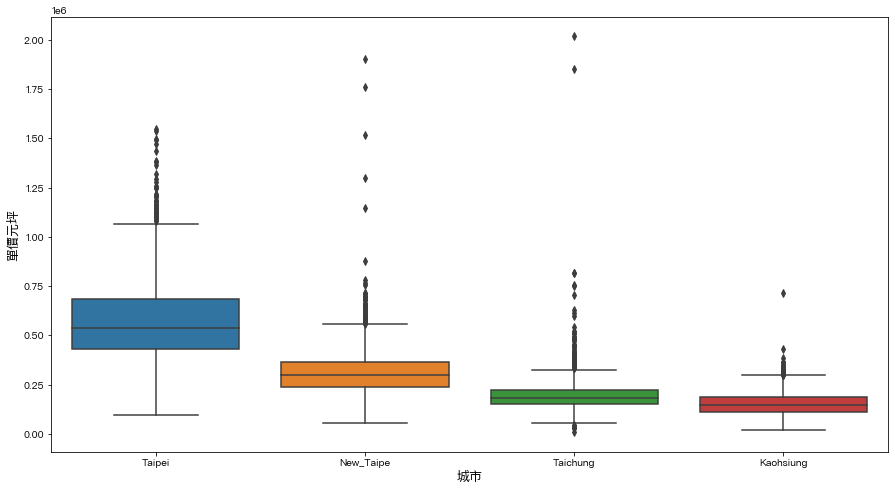

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_home_me = df_home.groupby(by = 'city').agg({'unit_price_square_feet': np.median})

order = df_home_me.sort_values(by='unit_price_square_feet', ascending=False).index
print(df_home_me.sort_values(by='unit_price_square_feet', ascending=False))

#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
plt.figure(figsize = (15,8))
sns.boxplot(x='city', y='unit_price_square_feet', data=df_home, order=order,)
plt.xlabel("城市",fontsize=13)
plt.ylabel("單價元坪",fontsize=13)
plt.show()


             total_price
room_number             
5             32355000.0
4             26990000.0
3             17030000.0
2             14600000.0
1              9550000.0


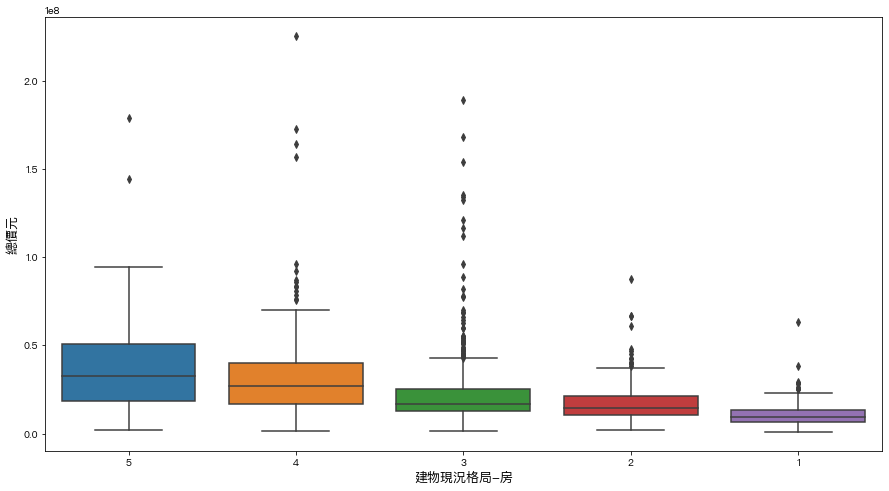

In [17]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖

df_tp_room = df_tp.groupby(by = 'room_number').agg({'total_price': np.median})
order_tp = df_tp_room.sort_values(by='total_price', ascending=False).index
print(df_tp_room.sort_values(by='total_price', ascending=False))

plt.figure(figsize = (15,8))
sns.boxplot(x='room_number', y='total_price', data=df_tp, order=order_tp,)
plt.xlabel("建物現況格局-房",fontsize=13)
plt.ylabel("總價元",fontsize=13)
plt.show()




             unit_price_square_feet
towns_label                        
8                     779585.123967
10                    659947.107438
7                     659692.561983
1                     658033.057851
0                     623034.710744
2                     603003.305785
5                     536555.371901
3                     513520.661157
6                     511084.297521
4                     453527.272727
9                     442932.231405
11                    416811.570248


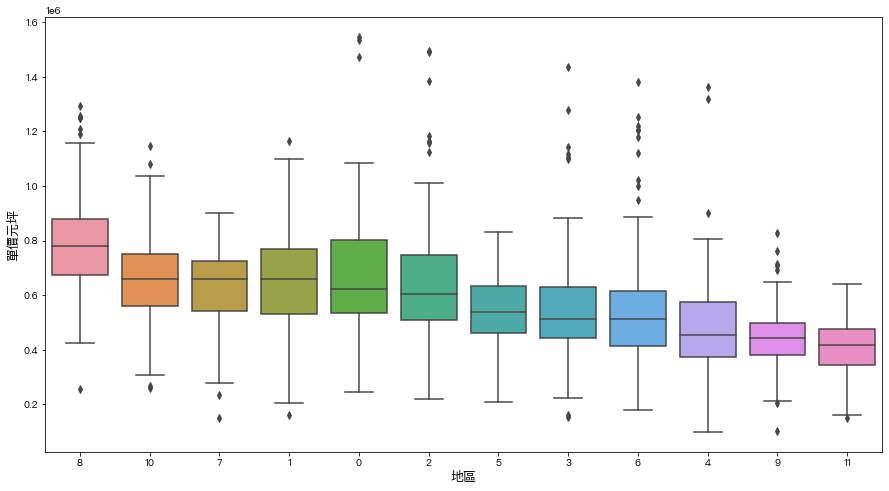

In [18]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_tp['towns_label'] = le.fit_transform(df_tp['towns'])


df_tp_towns = df_tp.groupby(by = 'towns_label').agg({'unit_price_square_feet': np.median})
order_towns = df_tp_towns.sort_values(by='unit_price_square_feet', ascending=False).index
print(df_tp_towns.sort_values(by='unit_price_square_feet', ascending=False))



plt.figure(figsize = (15,8))
sns.boxplot(x='towns_label', y='unit_price_square_feet', data=df_tp, order=order_towns,)
plt.xlabel("地區",fontsize=13)
plt.ylabel("單價元坪",fontsize=13)
plt.show()


In [19]:
print("單價元坪中位數最高區域為", (le.inverse_transform([8])))
print("單價元坪中位數次高區域為", (le.inverse_transform([10])))
print("單價元坪中位數最低區域為", (le.inverse_transform([11])))


單價元坪中位數最高區域為 ['大安區']
單價元坪中位數次高區域為 ['松山區']
單價元坪中位數最低區域為 ['萬華區']
